<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" width="50" height="50">

# Homework 3

## Problem 0: Load Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Problem 1: Matrix Algebra

In [78]:
###### Run this cell -- it does not need modification. #######
from sklearn.linear_model import LinearRegression, Ridge

def matches_sklearn_linreg(betas, X, y):
    """
    Returns True if `betas` match the sklearn LinearRegression betas,
    given data `X` and target `y`.
    """
    # Our X already has an intercept column of 1s prepended,
    #  so we tell sklearn not to prepend another one
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X, y)

    lr_betas = lr.coef_.reshape(-1,1)
    return np.isclose(lr_betas, betas).all()


def matches_sklearn_ridge(ridge_func, X, y, alpha=1.0):
    """
    Returns True if the `ridge_func` betas match the 
    sklearn Ridge betas, given data `X` and target `y`.
    """
    ridge_lr = Ridge(alpha=alpha, fit_intercept=False, solver='cholesky')
    ridge_lr.fit(X, y)

    ridge_betas = ridge_lr.coef_.reshape(-1,1)
    return np.isclose(ridge_betas, ridge_func(alpha)).all()

In this problem, you'll compute the coefficients for a regression manually, using linear algebra. Below, I construct a matrix 𝐗 and vector 𝐲 for you. Produce the OLS estimate as follows### Part A: Ordinary Least Squares
In this problem, you'll compute the coefficients for a regression _manually_, using linear algebra. Below, I construct a matrix $\mathbf{X}$ and vector $\mathbf{y}$ for you. Produce the OLS estimate as follows:

$$\hat\beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

(Here, $\beta$ is the vector of slope estimates, if you know what that means. If you don't, know that you're just being tasked with computing $\beta$ here!)

In [79]:
# Note that X has a column of 1s prepended (for the y-intercept)
X = np.load('data/X.npy')   # 300x20 matrix
y = np.load('data/y.npy')   # 300x1 column vector

In [80]:
betas = np.linalg.inv((X.T @ X)) @ (X.T @ y)

print(betas)

# TEST - when uncommented, returns True if correct
matches_sklearn_linreg(betas, X, y)

[[ 3.9556884 ]
 [-3.91274951]
 [ 8.053053  ]
 [-8.0174642 ]
 [ 8.94947197]
 [ 6.0516628 ]
 [ 5.03354572]
 [ 7.9140303 ]
 [ 4.02806253]
 [-1.00055382]
 [-1.02853503]
 [ 3.00893106]
 [ 9.95585065]
 [-0.96541588]
 [-6.97124311]
 [-4.97763643]
 [-3.96938252]
 [-8.04199218]
 [-3.06000985]
 [-9.09528544]]


True

### Part B: Ridge Regression
Now, we're going to compute a column vector of coefficients ($\beta$, pronounced "beta") for a special variant of OLS called _ridge regression_. For some scalar $\alpha > 0$ (pronounced "alpha"), they are computed as follows:

$$\hat\beta^{\text{ridge}} = (\mathbf{X}^T\mathbf{X} + \alpha I)^{-1}\mathbf{X}^T\mathbf{y}$$

**Write a function that takes $\alpha$ as input, and outputs $\hat\beta^{\text{ridge}}$**.

_HINT:_ To make an identity matrix of size $n$, you can use `np.eye(n)`.

In [81]:
def ridge_coefs(alpha):
    answer = np.linalg.inv(X.T @ X + (alpha * np.eye(len(X.T)))) @ (X.T @ y)
    return answer

# TEST - when uncommented, returns True if correct

matches_sklearn_ridge(ridge_coefs, X, y, alpha=1.0)

True

### Part C: Ridge Trace Plot
Using your function `ridge_coefs` and the vector of $\alpha$s given below, make a line plot with $\alpha$ on the x-axis, and $\|\hat\beta^{\text{ridge}}\|$ on the y-axis. (Recall that $||x||$ is the magnitude of $x$.)

> Ridge regression is a technique for combatting overfitting. It limits the size of $||\beta||$, which yields a less complex model that is less likely to overfit.

You should notice that $||\beta||$ (the model complexity) decreases as $\alpha$ increases. 

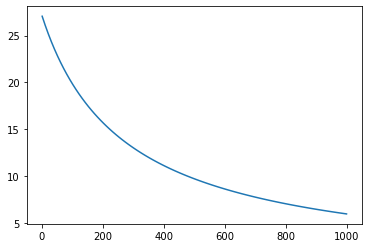

In [82]:
import matplotlib.pyplot as plt

alphas = np.linspace(1, 1000, 100)

ridge_list = []
for i in alphas:
    ridge_list.append(np.linalg.norm(ridge_coefs(i)))

plt.plot(alphas, ridge_list);

## Problem 2: Hypothesis Testing

### Part A: Data
Read in the `phone-time.csv` data. It contains daily statistics on the amount of minutes spent on the phone by Tim and Heather. Plot histograms of each person's phone usage. Do you think they're normally distributed? (Optional: Can you research and use a statistical test to determine if they are normal?)

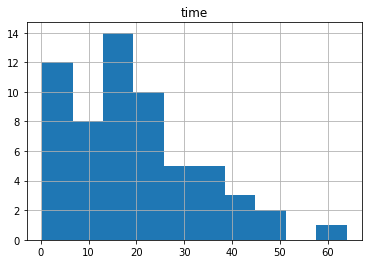

In [83]:
ph_df = pd.read_csv('./data/phone-time.csv', sep=',')

tim_df = ph_df[ph_df.name == 'Tim']

hth_df = ph_df[ph_df.name == 'Heather']

tim_df.hist();

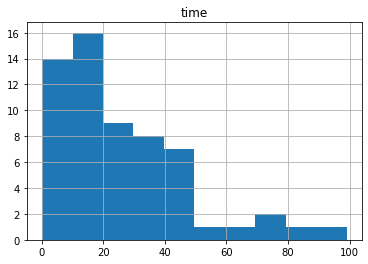

In [84]:
hth_df.hist();

In [85]:
print(hth_df.time.mean())
print(hth_df.time.median())

print(tim_df.time.mean())
print(tim_df.time.median())

#Answer: visually neither appears to be normally distributed, and in both distributions the median != the mean

print(stats.shapiro(hth_df.time))
print(stats.shapiro(tim_df.time))

#the shapiro-wilk test shows very low p-value so we can reject null hypothesis that the distributions are normal.

26.377604987009793
21.2771445871357
19.45538908856192
17.105278155747598
ShapiroResult(statistic=0.8966165781021118, pvalue=9.925183985615149e-05)
ShapiroResult(statistic=0.9418814182281494, pvalue=0.006579215172678232)


### Part B: Test Differences
Are Tim's and Heather's phone-usage times significantly different?

Carry out the appropriate hypothesis test of the difference in mean (or median!) phone times. **When importing the appropriate test, make sure your input goes in the very first cell of this notebook alongside your other imports!**

Hint:
* If you believe the distributions are normally distributed, use a **two-sample t-test**.
    - This tests whether or not the two _means_ are the same or different.
* If you believe the distributions are _not_ normal, use a **Mann-Whitney(-Wilcoxon) test**.
    - This tests whether or not the two _medians_ are the same or different. 



In [87]:
tim_time = tim_df.time
hth_time = hth_df.time

print(stats.mannwhitneyu(tim_time, hth_time))

print(stats.ttest_ind(tim_time, hth_time, axis=0, equal_var=True))


MannwhitneyuResult(statistic=1514.0, pvalue=0.06700346427027845)
Ttest_indResult(statistic=-2.072859925796017, pvalue=0.04036261391204511)


### Part C: Interpretation
In plain English, interpret your findings in Part B. Interpretation should be so simple, even a client can understand it.

In [91]:
# The Mann-Whitney test tells us that we are unable to reject the null hypothesis that Tim and Heather's phone usage is the same.